<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter14/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
import tensorflow_datasets as tfds

In [22]:
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

In [23]:
test_set, valid_set, train_set = tfds.load("tf_flowers", 
     split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
     as_supervised=True)

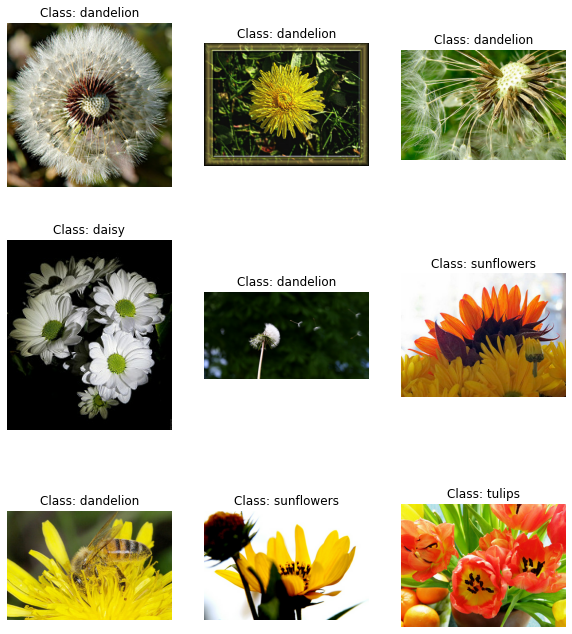

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
index=0

for image, label in train_set.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

In [25]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [26]:
batch_size = 32
train_set = train_set.shuffle(1000)

train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [27]:
base_model = keras.applications.xception.Xception(include_top=False,
                                                  weights="imagenet")

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)

model = keras.Model(inputs=base_model.input, outputs=output)

In [28]:
for layers in base_model.layers:
    layers.trainable = False

In [29]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 17s 194ms/step - loss: 1.2717 - accuracy: 0.7943 - val_loss: 0.8731 - val_accuracy: 0.8548
Epoch 2/5
86/86 [==============================] - 16s 190ms/step - loss: 0.4287 - accuracy: 0.9073 - val_loss: 0.7704 - val_accuracy: 0.8621
Epoch 3/5
86/86 [==============================] - 16s 184ms/step - loss: 0.1731 - accuracy: 0.9473 - val_loss: 0.7550 - val_accuracy: 0.8512
Epoch 4/5
86/86 [==============================] - 15s 179ms/step - loss: 0.1079 - accuracy: 0.9633 - val_loss: 0.8075 - val_accuracy: 0.8512
Epoch 5/5
86/86 [==============================] - 16s 181ms/step - loss: 0.0821 - accuracy: 0.9713 - val_loss: 0.6495 - val_accuracy: 0.8730
